In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


3


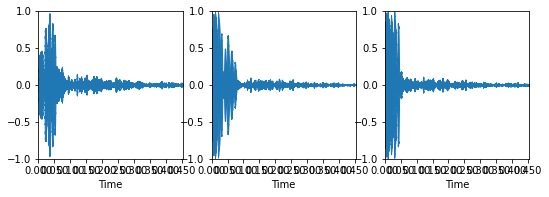

In [ ]:
import librosa #library untuk baca audio, extract feature audio, preprocessing
import glob #library untuk membaca path file
import matplotlib.pyplot as plt #library untuk visualisasi data
import librosa.display #library untuk visualisasi audio
import numpy as np #library untuk komputasi

path1 = '/content/drive/My Drive/dataset/music_retrieval/kick*.wav' #path audio file
kick = [ #kita buat array yang isinya file audio  
	librosa.load(p)[0] for p in glob.glob(path1)  #glob untuk baca path --> librosa untuk audio
]
path2 = '/content/drive/My Drive/dataset/music_retrieval/snare*.wav' #path audio file
snare = [ #kita buat array yang isinya file audio  
	librosa.load(p)[0] for p in glob.glob(path2)  #glob untuk baca path --> librosa untuk audio
]
path3 = '/content/drive/My Drive/dataset/music_retrieval/Tom-*.wav' #path audio file
tom = [ #kita buat array yang isinya file audio  
	librosa.load(p)[0] for p in glob.glob(path3)  #glob untuk baca path --> librosa untuk audio
]
path4 = '/content/drive/My Drive/dataset/music_retrieval/Clap-*.wav' #path audio file
clap = [ #kita buat array yang isinya file audio  
	librosa.load(p)[0] for p in glob.glob(path4)  #glob untuk baca path --> librosa untuk audio
]


print(len(kick))
#plotting dengan matplotlib untuk wave
plt.figure(figsize=(15, 6)) #buat figure
for i, x in enumerate(kick): #kita loop
	plt.subplot(2,5,i+1)  #buat subplot masing - masing 
	librosa.display.waveplot(x[:10000])  #cetak waveplot detik awal - 10 detik
	plt.ylim(-1,1)

plt.show()

In [ ]:
import IPython.display as ipd
ipd.Audio('/content/drive/My Drive/dataset/music_retrieval/kick2.wav')

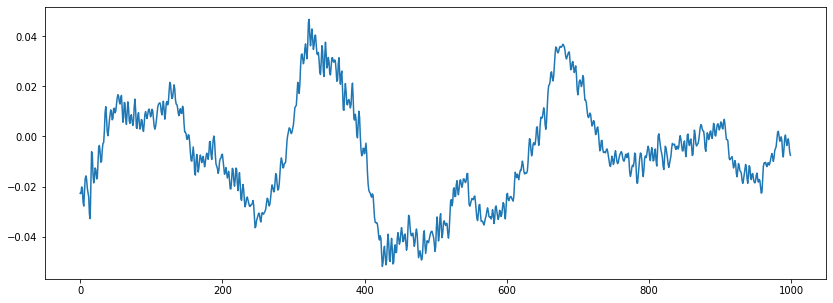

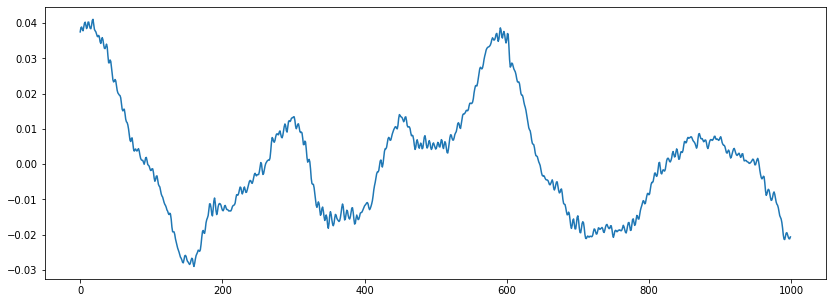

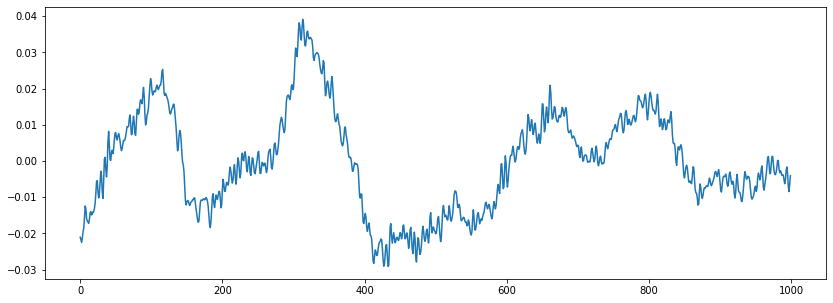

In [ ]:
for i, x in enumerate(kick):
  n0 = 6500
  n1 = 7500
  plt.figure(figsize=(14, 5))
  plt.plot(x[n0:n1])

In [ ]:
def extract_features(signal): #menerima inputan chunk
	return [ 
		librosa.feature.zero_crossing_rate(signal)[0, 0], #ekstraksi ZCR
		librosa.feature.spectral_centroid(signal)[0, 0]  #ekstraksi spectral
    #tambahkan feature extraction lainnya
	]
sample_k = np.array([extract_features(x) for x in kick]) #loop semua chunk --> f
sample_s = np.array([extract_features(x) for x in snare]) #loop semua chunk --> f
sample_c = np.array([extract_features(x) for x in clap]) #loop semua chunk --> f
sample_t = np.array([extract_features(x) for x in tom]) #loop semua chunk --> f
sample_k
#feature extraction function, yang dikirimkan adalah signal nya 
#sample1_f #cetak sample1_f yang berisi feature yang sudah di ekstraksi

array([[6.83593750e-03, 1.37691465e+03],
       [5.37109375e-03, 9.25607100e+02],
       [5.85937500e-03, 1.59824249e+03]])

In [ ]:
feature_table = np.vstack((sample_k, sample_s, sample_t, sample_c))
print(feature_table.shape)

(12, 2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))
training_features

[-1. -1.]
[1. 1.]


array([[-0.98275862, -0.76370094],
       [-1.        , -1.        ],
       [-0.99425287, -0.64781641],
       [ 0.13218391,  0.26799813],
       [-0.07471264, -0.34860248],
       [ 0.2183908 , -0.0112138 ],
       [-0.78735632, -0.42072464],
       [-0.73563218, -0.12451922],
       [-0.65517241,  0.2293784 ],
       [ 1.        ,  0.79555634],
       [ 0.87356322,  0.6966186 ],
       [ 0.90804598,  1.        ]])

In [ ]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(training_features)
X_scaled

array([[-1.07043772, -1.19588706],
       [-1.09328049, -1.57960281],
       [-1.08566624, -1.00770723],
       [ 0.40672826,  0.47944409],
       [ 0.13261499, -0.52182677],
       [ 0.52094213,  0.02604401],
       [-0.81155296, -0.6389428 ],
       [-0.74302464, -0.15794773],
       [-0.63642504,  0.41673119],
       [ 1.55648117,  1.33612289],
       [ 1.3889675 ,  1.1754622 ],
       [ 1.43465305,  1.66811003]])

In [ ]:
training_features.shape

(6, 2)

Text(0, 0.5, 'Spectral Centroid')

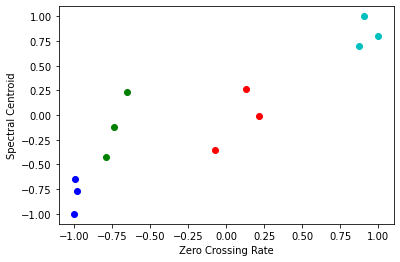

In [ ]:
plt.scatter(training_features[:3,0], training_features[:3,1], c='b')
plt.scatter(training_features[3:6,0], training_features[3:6,1], c='r')
plt.scatter(training_features[6:9,0], training_features[6:9,1], c='g')
plt.scatter(training_features[9:12,0], training_features[9:12,1], c='c')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

Text(0, 0.5, 'Spectral Centroid')

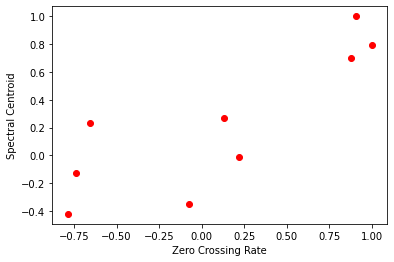

In [ ]:

plt.scatter(training_features[3:,0], training_features[3:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

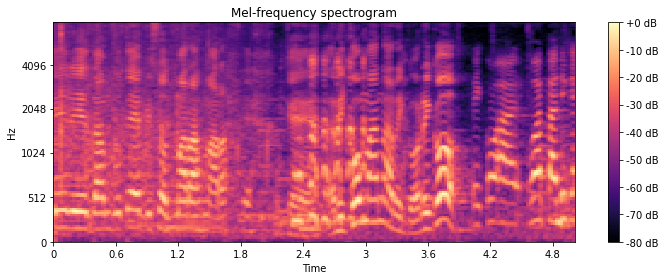

In [ ]:
import matplotlib.pyplot as plt
import librosa

#load audio file dengan librosa, kemudian diubah menjadi sampling rate (sr) dan data (y)
y, sr = librosa.load("/content/drive/My Drive/dataset/potongan2.wav")
#plot data wave/audio ke melspectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
#cetak spectrogram
plt.figure(figsize=(10, 4)) 
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr,fmax=8000) 
plt.colorbar(format='%+2.0f dB') 
plt.title('Mel-frequency spectrogram') 
plt.tight_layout() 
plt.show()
